In [1]:
import train

import torch 
import torchvision
import os
import argparse
import matplotlib.pyplot as plt


from model import Generator
from utils import load_model

GPU is not available


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def generate(G, batch_size=2048, n_samples=101):
    # Check if GPU is available
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print('GPU is available')
    else:
        device = torch.device("cpu")
        print('GPU is not available')


    print('Model Loading...')
    # Model Pipeline
    mnist_dim = 784

    model = Generator(g_output_dim = mnist_dim).to(device)
    model = load_model(model, 'checkpoints')
    model = torch.nn.DataParallel(model).to(device)
    model.eval()

    print('Model loaded.')



    print('Start Generating')
    os.makedirs('samples', exist_ok=True)

    i = 0
    with torch.no_grad():
        while i<n_samples:
            z = torch.randn(batch_size, 100).to(device)
            x = model(z)
            x = x.reshape(batch_size, 28, 28)
            for k in range(x.shape[0]):
                if i<n_samples:
                    torchvision.utils.save_image(x[k:k+1], os.path.join('samples', f'{i}.png'))         
                    
                if i < 9:
                    # Plot the first 9 generated images
                    img = x[k].cpu().numpy()
                    plt.subplot(3, 3, i+1)
                    plt.imshow(img, cmap='gray')
                    plt.axis('off')
                i += 1

Used divergence: GAN
GPU is not available
Dataset loading...
Dataset Loaded.
Model Loading...
Model loaded.
Start Training :


100%|██████████| 400/400 [22:49<00:00,  3.42s/it]

Training done


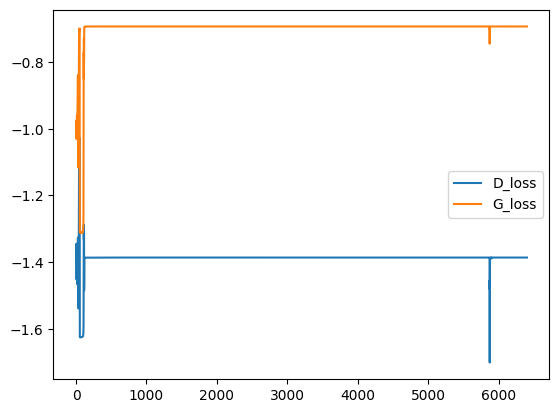

In [4]:
# ToDo: Substitute printing by plotting
G, D, G_loss_history, D_loss_history = train.main(epochs = 400, lr = 0.0002, batch_size = 64, mnist_size = 1000, f_divergence = 1)
plt.plot(D_loss_history, label = "D_loss")
plt.plot(G_loss_history, label = "G_loss")
plt.legend()

In [7]:
generate(G, 2048, 101)

GPU is not available
Model Loading...


TypeError: super(type, obj): obj must be an instance or subtype of type